# Classifying Room Sounds using Deep Learning

## 2 Data Exploration and Visualisation

### Audio sample file data overview

These sound excerpts are digital audio files in .wav format. 

Sound waves are digitised by sampling them at discrete intervals known as the sampling rate (typically 44.1kHz for CD quality audio meaning samples are taken 44,100 times per second). 

Each sample is the amplitude of the wave at a particular time interval, where the bit depth determines how detailed the sample will be also known as the dynamic range of the signal (typically 16bit which means a sample can range from 65,536 amplitude values). 

This can be represented with the following image: 
<img src="https://i.imgur.com/PJeiFdy.png">

Therefore, the data we will be analysing for each sound excerpts is essentially a one dimensional array or vector of amplitude values. 

### Analysing audio data 

For audio analysis, we will be using the following libraries: 

#### 1. IPython.display.Audio 

This allows us to play audio directly in the Jupyter Notebook. 

#### 2. Librosa 

librosa is a Python package for music and audio processing by Brian McFee and will allow us to load audio in our notebook as a numpy array for analysis and manipulation. 

You may need to install librosa using pip as follows: 

`pip install librosa` 

### Auditory inspection 

We will use `IPython.display.Audio` to play the audio files so we can inspect aurally. 

In [6]:
import IPython.display as ipd

ipd.Audio('./Data/1582038864612_conversation.wav')


### Visual inspection

We will load a sample from each class and visually inspect the data for any patterns. We will use librosa to load the audio file into an array then librosa.display and matplotlib to display the waveform. 

In [2]:
# Load imports
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

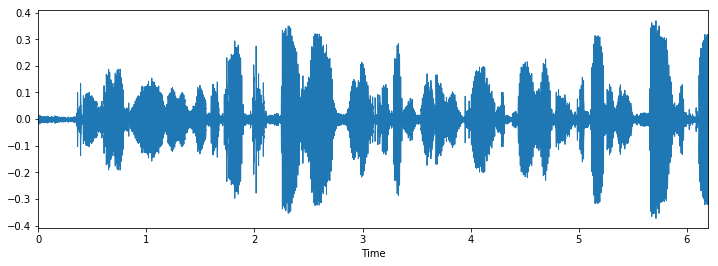

In [4]:
# Class: Conversation

filename = './Data/1582038864612_conversation.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

### Observations 

To Do

### Class distributions

In [13]:
import os
print('Number of conversation files:',len(os.listdir('./Data')))
    

Number of conversation files: 1124


### Observations 
To Do
¿Balanced dataset?

### Audio sample file properties

Next we will iterate through each of the audio sample files and extract, number of audio channels, sample rate and bit-depth. 

In [23]:
# Load various imports 
import pandas as pd
import os
import librosa
import librosa.display
from pydub import AudioSegment, utils


audiodata = []
for file in os.listdir('./Data'):
    sound = AudioSegment.from_wav('./Data/' + file)
    info = utils.mediainfo('./Data/' + file)
    num_channels = int(info['channels'])
    sample_rate = int(info['sample_rate'])
    bit_depth = sound.sample_width
    audiodata.append((num_channels, sample_rate, bit_depth))
# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])
audiodf.head()

,num_channels,sample_rate,bit_depth
0,1,16000,2
1,1,16000,2
2,1,16000,2
3,1,16000,2
4,1,16000,2


### Audio channels 

Most of the samples have two audio channels (meaning stereo) with a few with just the one channel (mono). 

The easiest option here to make them uniform will be to merge the two channels in the stero samples into one by averaging the values of the two channels. 

In [7]:
# num of channels 

print(audiodf.num_channels.value_counts(normalize=True))

NameError: name 'audiodf' is not defined

### Sample rate 

There is a wide range of Sample rates that have been used across all the samples which is a concern (ranging from 96k to 8k).

This likley means that we will have to apply a sample-rate conversion technique (either up-conversion or down-conversion) so we can see an agnostic representation of their waveform which will allow us to do a fair comparison. 

In [29]:
# sample rates 

print(audiodf.sample_rate.value_counts(normalize=True))

16000    1.0
Name: sample_rate, dtype: float64


### Bit-depth 

There is also a wide range of bit-depths. It's likely that we may need to normalise them by taking the maximum and minimum amplitude values for a given bit-depth. 

In [30]:
# bit depth

print(audiodf.bit_depth.value_counts(normalize=True))

2    1.0
Name: bit_depth, dtype: float64


### Other audio properties to consider 

We may also need to consider normalising the volume levels (wave amplitude value) if this is seen to vary greatly, by either looking at the peak volume or the RMS volume. 

### *In the next notebook we will preprocess the data*